## Udemy Course - Deep Learning, Neural Networks, Tensorflow

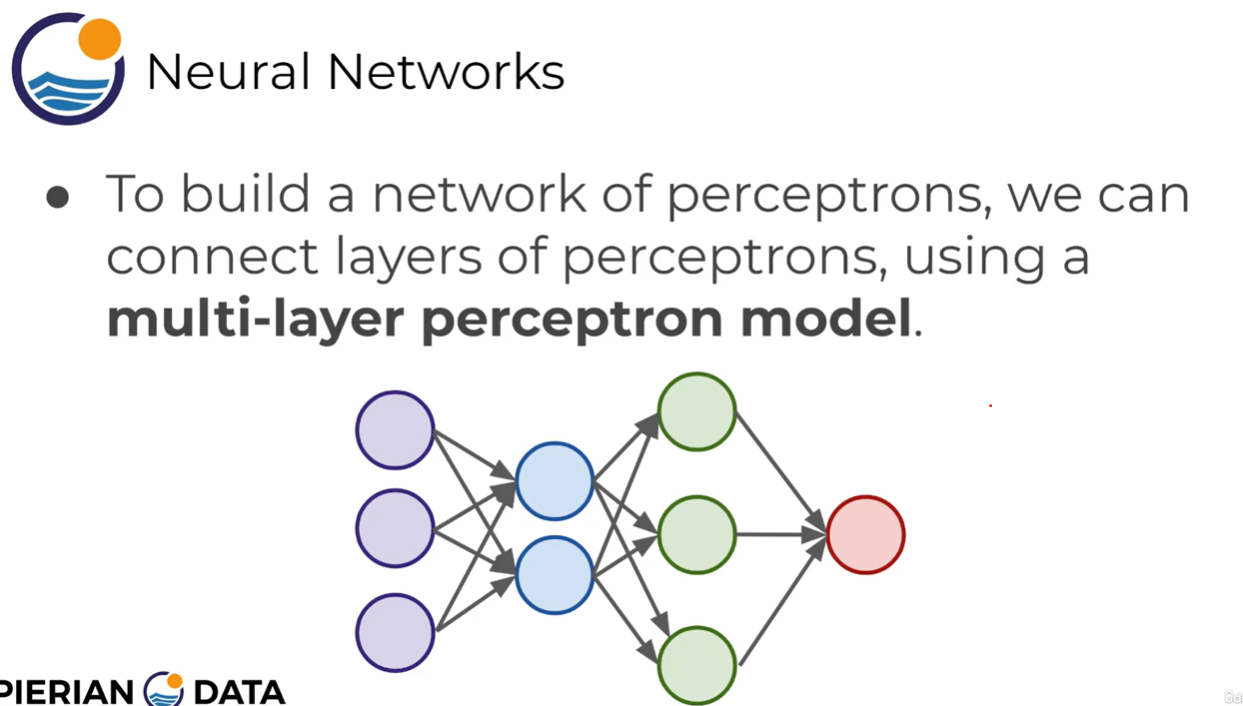

input layer is connected to every layer

input layer is layer that recieves the data, could be tabular data that has features on info you are trying to predict off of.
output layer is the final estimate of the output that the neural network outputs
output layer has 1 neuron above, but with multi class classification it can have many neurons

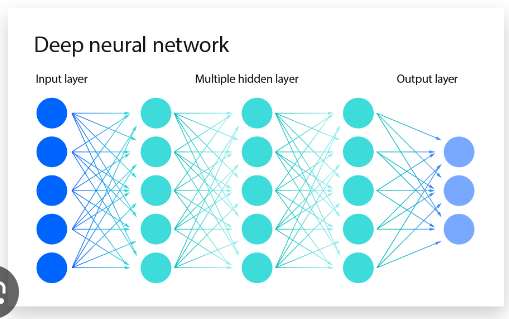


Input layer is 
A neural network can become a 
Deep neural network is when there are two or more hidden layers

Universal Approximation therorem

In classification tasks, it would be useful for the outputs fall within 0 and 1.
These values can present probability assignments for each class.

#### Activation functions - to set boundaries to output values from the neuron

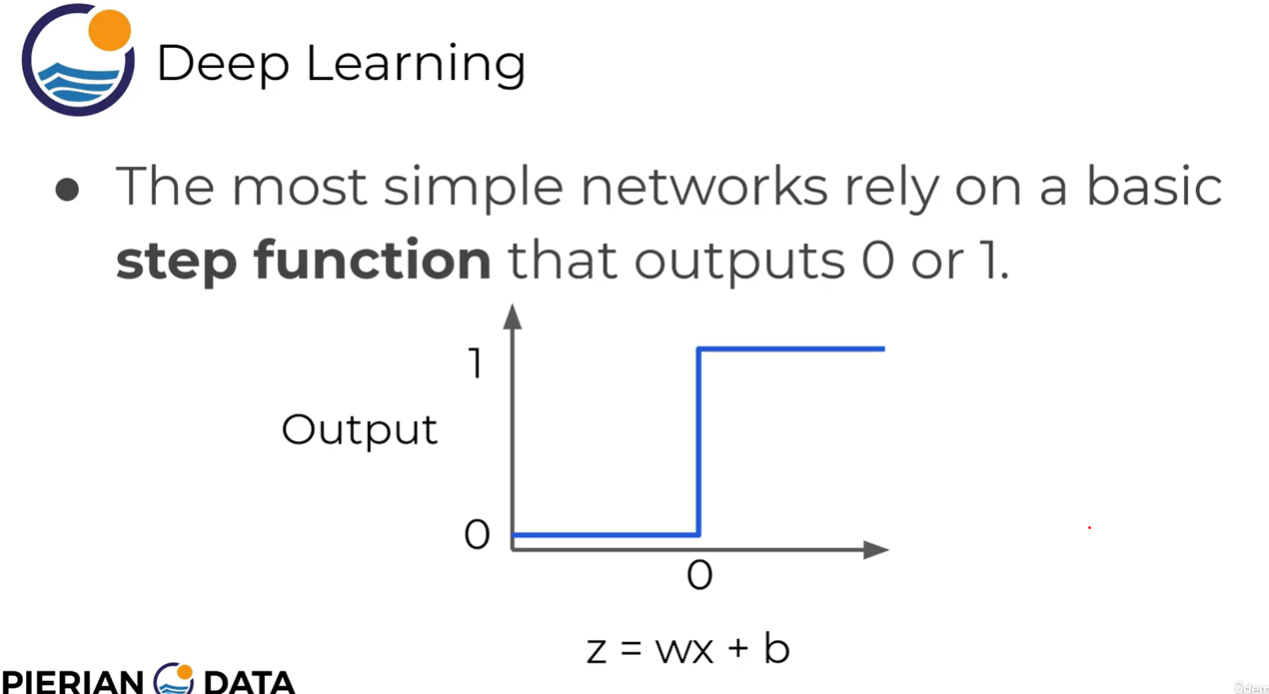

This is a strong step fucntion, it isnt any variation between 0 and 1

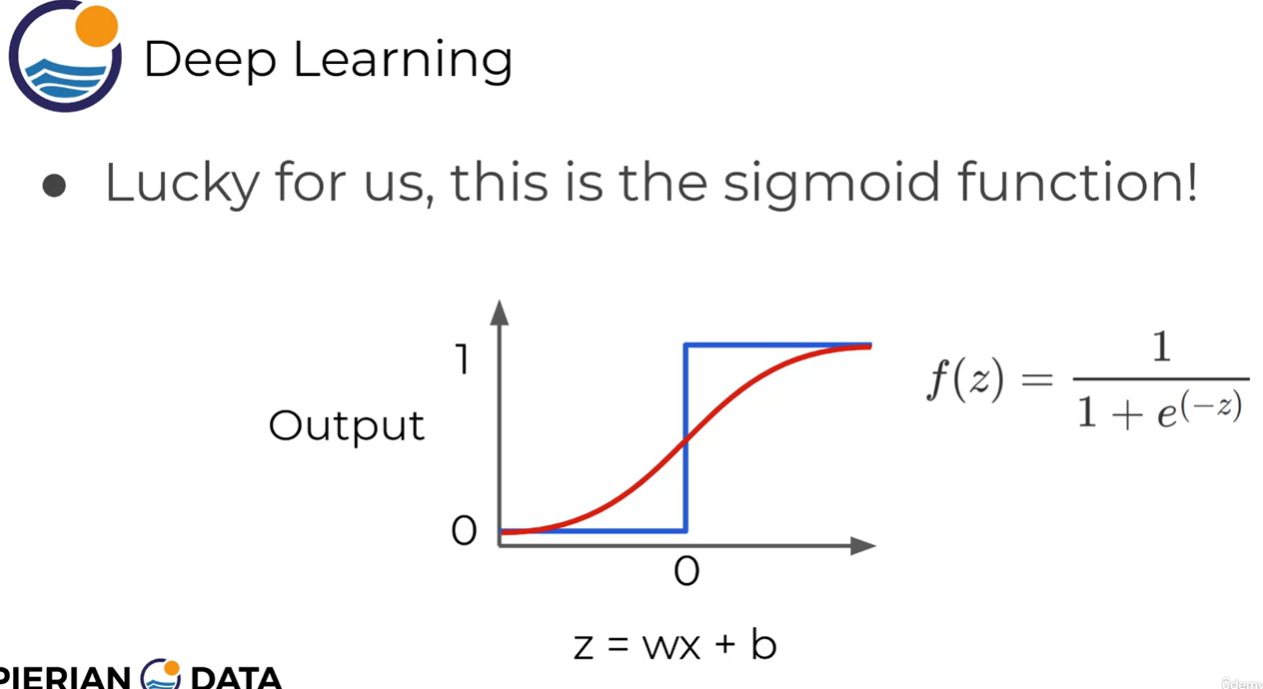

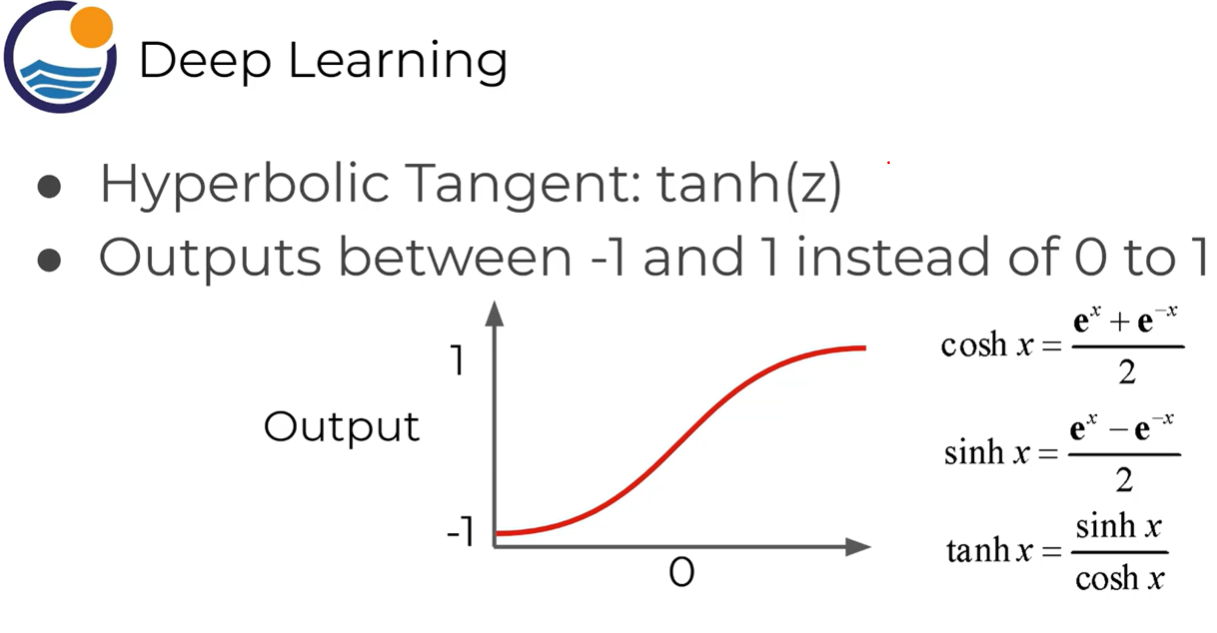

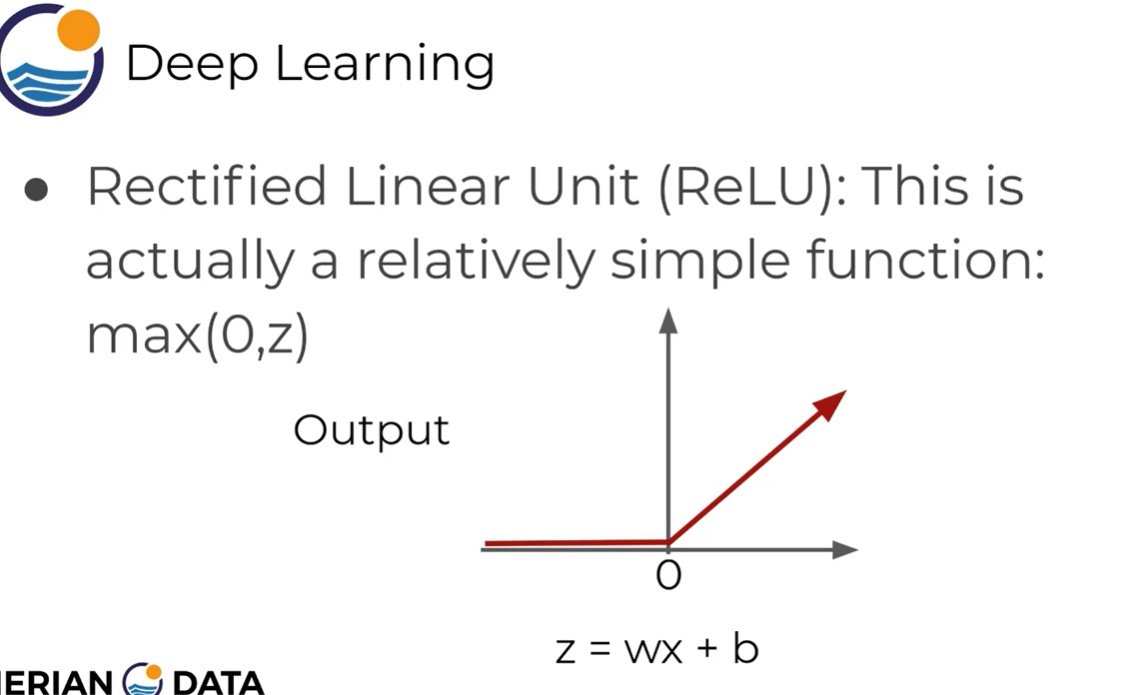

Can look for research of full list of activation functions

Above examples are of single class situations 

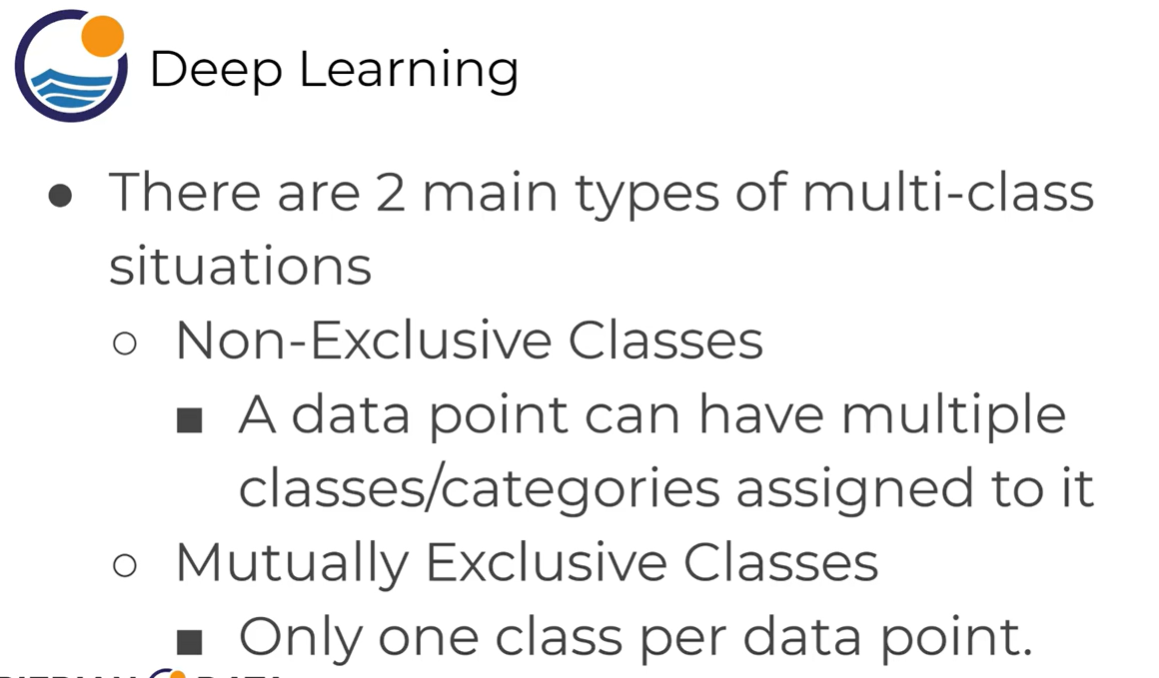

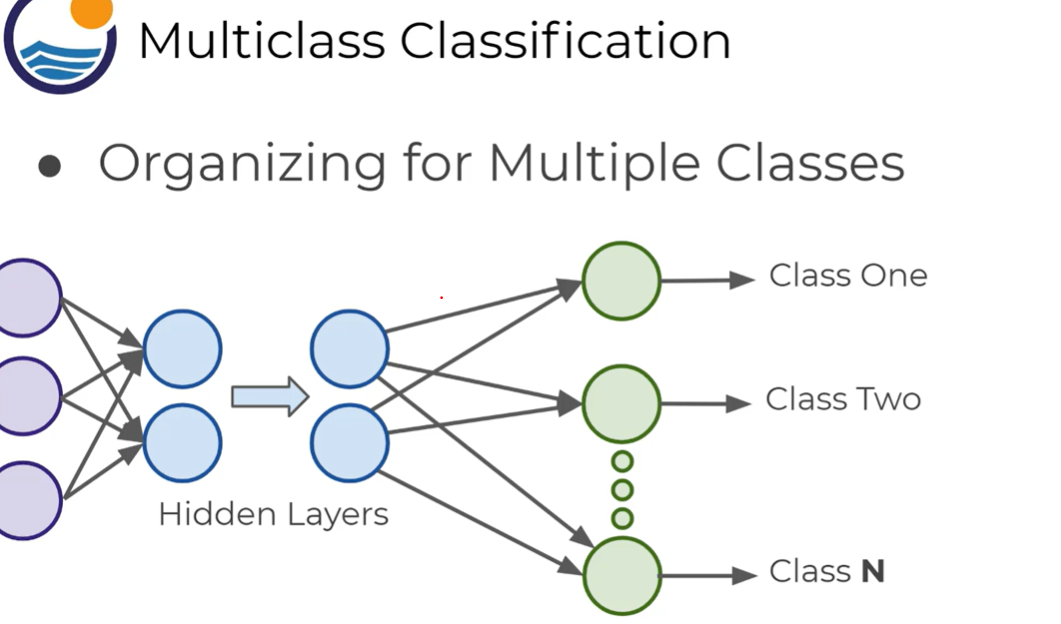

#### For organizing multiple classes we can use ONE HOT ENCODING


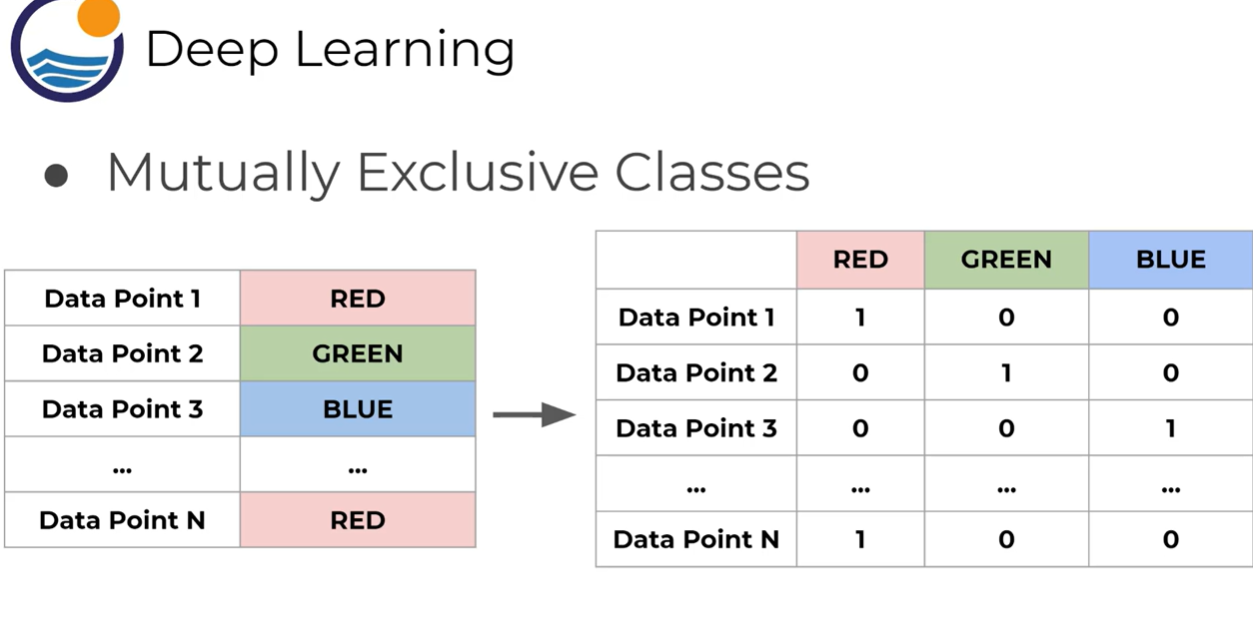

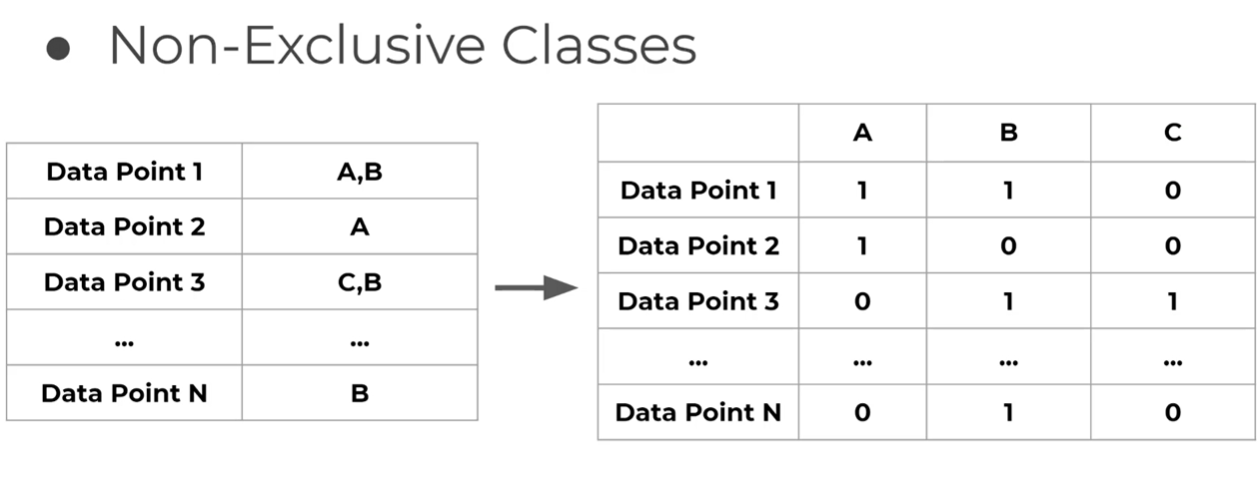

#### Cost Functions and Gradient Descent

cost function (lost functions or error functions)

neural networks take in inputs. mulitply them by weights and add biases to them
then this result is passed through an activation function which at the end of all the layers leads to some output

this output y hat is the models estimation of what it predicts the label to be

the training period will take the estimated outputs of the network and then compare them to the real values of the label.

the cost/loss function must be an avergae so it can output a single value

### Back propagation 

### keras and tensorflow

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
# we will treat this as a regression problem
# this will be a supervised learning becuse we have historical information
# based off feature 1 and feature 2, we can predict the price.
# measurements of rare gemstones..

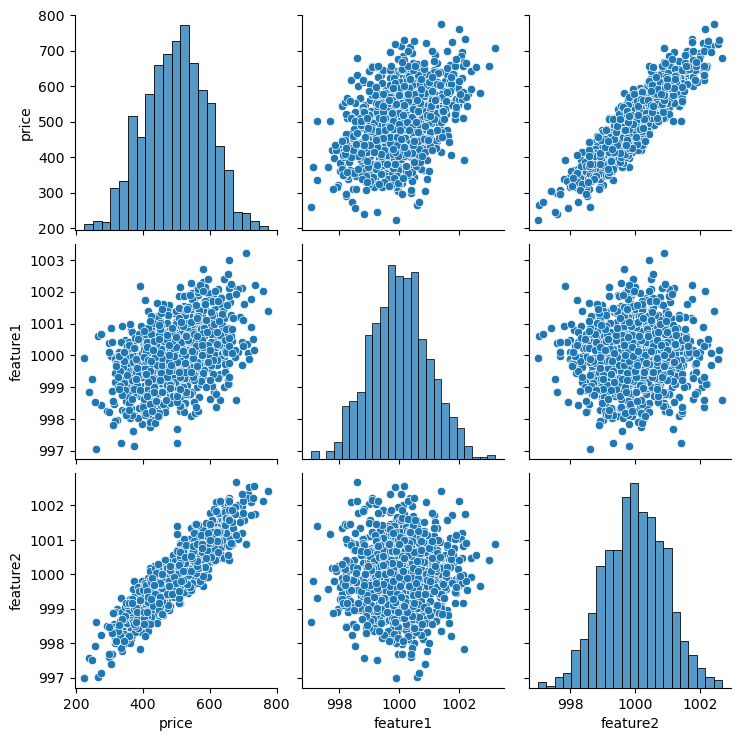

In [4]:
# pairplot of dataframe

sns.pairplot(df)

In [6]:
# step 2 create test train split from sklearn model selection has test train split

from sklearn.model_selection import train_test_split

In [7]:
# the way tensorflow works we have to pass in numpy arrays instead of pandas dataframe
# add dot values to return it back as numpy array
# grab the features we want to use (have to pass numpy arrays, not pandas dataframs or pandas series)

X = df[['feature1','feature2']].values

# y will be our price column

y = df['price'].values


# we have uppercase X and lowercase y

In [9]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
# call train test split
# random state is because it grabs random rows so this will set the number as the same each time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape
# training data is 700 rows or 70% of data

(700, 2)

In [13]:
X_test.shape
# test data is 300 rows or 30% of data

(300, 2)

In [14]:
# if we have large values in feature set it could cause erros with the weights
# we will talk about vanishing and exploding gradients later

# 1 way to try to avoid issues training your network is to normalize and scale feature data

# with this from sklearn
from sklearn.preprocessing import MinMaxScaler

In [15]:
# create an instance of the scaler

scaler = MinMaxScaler()

In [16]:
# fit scaler onto training data
# the reason we run on the training set to prevent (data leakage) (not having prior info of the training set )

scaler.fit(X_train)

MinMaxScaler()

In [17]:
# transform the training data(only fit scaler to the test set)
# 1st step.. above is fit the calcultion of what is needed for the transformation to occur
# 2nd step.. this is performing the transformation

X_train = scaler.transform(X_train)

In [18]:
# now do the same for the test set of data(set the scaler on the test set)

X_test = scaler.transform(X_test)

In [20]:
# if we take a look at the data it has been scaled 
# (between 0 and 1)
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [22]:
X_train.max()

1.0

In [23]:
X_train.min()

0.0

In [ ]:
########### Create model, run model  and generate predictions

In [25]:
# create model with keras syntax . 
# import from tensorflow (keras api is packaged inside tensorflow), just like we already installed keras library seperately 
# import sequential model and import Dense layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# can do     help(Sequential) for great documentation on how to do it.

In [27]:
# 2 ways of creating keras based model
# 1 way below  ( call sequential and pass in list of the actual layers i want )
# dense layer is every layer is connected
# will have a lot of parameter calls inside of it(units and actiivation are important ones)
## (units=neurons/how many to be in this layer  and  activation="relu" functions of math behind the dense neural network)
# if we want another dense layer then we add another dense call layer under it
# last layer is the output layer with 1 unit  Dense(1)

model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [30]:
# 2nd way of doing it and our preferred way for this course..
# create empty sequatial model variable then add dense layers one at a time
# the last layer is 1 final output node and we dont want any activation type with it because its over

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))


# the final output layer is important and depends on data and situation
# we are predicting 1 numerical price value (so 1 neuron on end)

# then the final output will be measured againast true price with a loss function

# compile the model (shift tab has many parameter calls (optimzer and lost function (gradient descent: with rms prop or adam optimizer ) and loss paramter))
# in our case we are performing a regression problem, because our label is a contionus value, so we will use mean squared error as our loss functionailty(mse of our predictions against our values and try to minimize that through our optimizer call)
model.compile(optimizer='rmsprop',loss='mse')

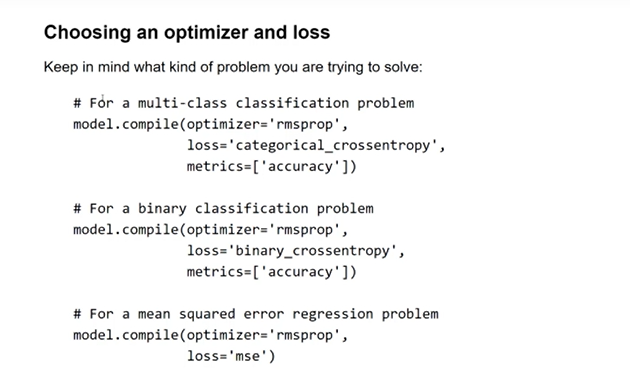

In [54]:
# now we can train the model or 'fit' the model to the training data
# shift tab shows wide variety of parameters
# like x is features that we are training on , y is what the training lables are , and epochs is going through the dataset 1 time
# verbose equals printed output during training

model.fit(x=X_train, y=y_train, epochs=250)

# below our 'loss' or mean squared error is large becuase we start with random weights and biases

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 239127.8125
Epoch 2/250
22/22 [==============================] - 0s 869us/step - loss: 238404.0000
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 237662.6562
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 236899.1562
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 236118.1094
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 235320.3438
Epoch 7/250
22/22 [==============================] - 0s 815us/step - loss: 234501.4375
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 233669.5312
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 232810.2344
Epoch 10/250
22/22 [==============================] - 0s 746us/step - loss: 231936.8281
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 231042.1562
Epoch 12/250
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 995us/step - loss: 1624.9259
Epoch 190/250
22/22 [==============================] - 0s 818us/step - loss: 1611.9626
Epoch 191/250
22/22 [==============================] - 0s 730us/step - loss: 1597.4104
Epoch 192/250
22/22 [==============================] - 0s 914us/step - loss: 1583.0527
Epoch 193/250
22/22 [==============================] - 0s 758us/step - loss: 1568.9510
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 1553.6754
Epoch 195/250
22/22 [==============================] - 0s 785us/step - loss: 1538.4779
Epoch 196/250
22/22 [==============================] - 0s 789us/step - loss: 1524.1809
Epoch 197/250
22/22 [==============================] - 0s 957us/step - loss: 1510.4583
Epoch 198/250
22/22 [==============================] - 0s 562us/step - loss: 1497.7563
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 1484.0667
Epoch 200/250
22/22 [==============================] - 0s 802

In [55]:
# plot out the loss values decreasing changes
# returns a dictionary of historical losses

model.history.history

{'loss': [239127.8125,
  238404.0,
  237662.65625,
  236899.15625,
  236118.109375,
  235320.34375,
  234501.4375,
  233669.53125,
  232810.234375,
  231936.828125,
  231042.15625,
  230128.828125,
  229194.421875,
  228237.890625,
  227266.234375,
  226274.125,
  225261.09375,
  224230.234375,
  223178.28125,
  222107.8125,
  221012.234375,
  219898.46875,
  218764.046875,
  217608.203125,
  216428.75,
  215236.140625,
  214026.078125,
  212791.0625,
  211533.0,
  210259.75,
  208960.75,
  207638.578125,
  206296.65625,
  204935.703125,
  203555.46875,
  202154.375,
  200732.046875,
  199289.46875,
  197828.046875,
  196343.640625,
  194832.484375,
  193311.015625,
  191767.3125,
  190199.34375,
  188623.640625,
  187015.640625,
  185395.1875,
  183747.71875,
  182091.09375,
  180405.390625,
  178701.859375,
  176981.3125,
  175241.90625,
  173486.109375,
  171721.03125,
  169921.390625,
  168111.890625,
  166284.34375,
  164441.125,
  162568.234375,
  160682.625,
  158785.28125,
  15

In [56]:
# pass it into a dataframe

loss_df = pd.DataFrame(model.history.history)

<Axes: >

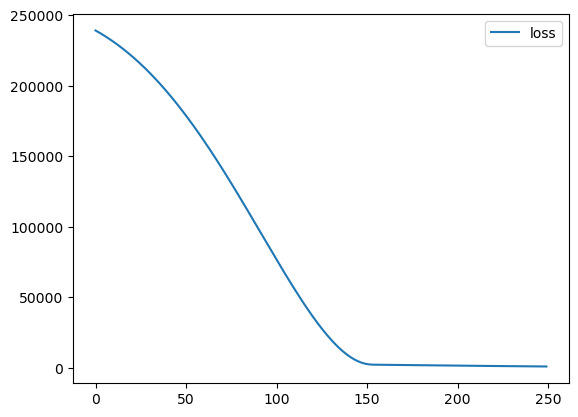

In [57]:
# plot out the loss dataframe
# as weights and biases get adjusted, then the loss values level out
# later we can compare it to validation loss to check for overfitting

loss_df.plot()

In [ ]:
# so how will this model do against data it hasnt seen before, which is our test data

In [58]:
# some methods to do this
# on the data it hasnt seen before it is getting back a mean squarred error of 241767.6875

model.evaluate(X_test,y_test,verbose=0)

838.06884765625

In [59]:
# do this on our training set
# we see the loss on our training set
# this is to see how to predictions are doing

model.evaluate(X_train,y_train,verbose=0)

851.9056396484375

In [60]:
# get true predictions
# pass in training data
# based off these features, what does it think the price will be

test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [61]:
test_predictions

array([[434.02673],
       [591.32556],
       [573.5931 ],
       [543.1475 ],
       [384.73618],
       [556.15924],
       [492.31497],
       [481.22028],
       [526.9689 ],
       [474.56592],
       [583.38165],
       [558.7816 ],
       [442.35605],
       [431.60434],
       [633.6055 ],
       [463.12518],
       [526.097  ],
       [599.2493 ],
       [611.61273],
       [558.0467 ],
       [371.80914],
       [461.20255],
       [409.50873],
       [415.85812],
       [548.7794 ],
       [570.77496],
       [522.45123],
       [452.311  ],
       [601.6428 ],
       [448.7522 ],
       [469.19055],
       [491.6488 ],
       [459.50223],
       [623.6306 ],
       [462.0337 ],
       [433.90567],
       [526.55334],
       [540.4284 ],
       [492.79767],
       [406.52582],
       [592.4665 ],
       [448.4464 ],
       [581.48285],
       [478.5    ],
       [503.3174 ],
       [584.48285],
       [641.2939 ],
       [503.7083 ],
       [381.2433 ],
       [489.74033],


In [62]:
# test predictions
# turn it into pandas series

test_predictions = pd.Series(test_predictions.reshape(300,))

In [63]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [64]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [65]:
pred_df

,Test True Y,0
0,402.296319,434.026733
1,624.156198,591.325562
2,582.455066,573.593079
3,578.588606,543.147522
4,371.224104,384.736176
...,...,...
295,525.704657,513.663574
296,502.909473,478.372345
297,612.727910,583.744385
298,417.569725,452.500977


In [66]:
# rename column names
pred_df.columns=['Test True Y', 'Model Predictions']

In [67]:
# true price vs model prediction below
pred_df

,Test True Y,Model Predictions
0,402.296319,434.026733
1,624.156198,591.325562
2,582.455066,573.593079
3,578.588606,543.147522
4,371.224104,384.736176
...,...,...
295,525.704657,513.663574
296,502.909473,478.372345
297,612.727910,583.744385
298,417.569725,452.500977


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

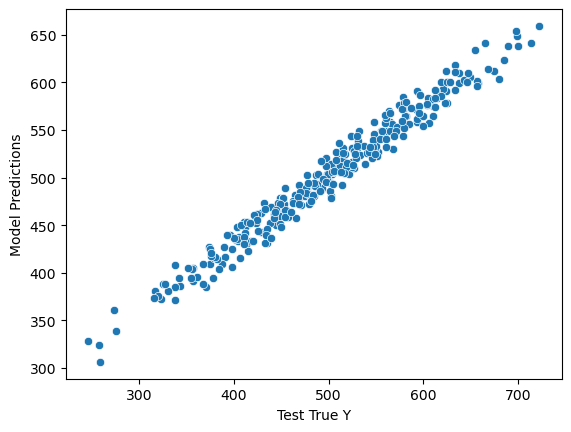

In [68]:
# plot these against each other
# line should be perfect based on price

sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [69]:
# regression evaluation
# grab those

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
# this will be the average predicted difference off from real price point
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

22.861110065120652

In [73]:
# look at original data
# have to take into account values to see if difference in error is good or bad

df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [77]:
# do it for mean squared error

# for root mean squared error add the **0.5

mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

28.94941824648073

In [78]:
###  Now lets do it again but inside we are adding new value to use
# so we will reuse the model for new data

new_gem = [[998,1000]]

In [79]:
# ask the model.. what do we price it at
# remember the model is trained on scaled features
# so we have to take original scaler and tranform new data

new_gem = scaler.transform(new_gem)
# scaled verison of this new data

In [80]:
# pass that into the model to predict new price (it says 424 as predicted price)

model.predict(new_gem)

1/1 [==============================] - 0s 40ms/step


array([[424.4981]], dtype=float32)

In [81]:
# if running a complex model we want to save the model
# so import this below 

from tensorflow.keras.models import load_model


In [82]:
# save it as an hdf5 file
# can load up load_model in another notebook later, by using import command of load model
model.save('my_gem_model.h5')


C:\Users\D8ISU4A\AppData\Local\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
# in later notebook
#import load_model

later_model = load_model('my_gem_model.h5')

In [84]:
# now we can use the model again
# make another prediction on new dataset with it.
# but we will use new_gem in this example
# get same result as above

later_model.predict(new_gem)

1/1 [==============================] - 0s 66ms/step


array([[424.4981]], dtype=float32)